In [1]:
%pip install ultralytics


     -------------------------------------- 609.5/609.5 kB 9.7 MB/s eta 0:00:00


In [1]:
from ultralytics import YOLO

In [4]:
# Load a model
model = YOLO("./models/yolov8n-pose.pt")  # build a new model from scratch
# model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

results = model(source="./sample/workout.mp4", show=True, conf=0.3, save=True)



    WARNING  stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Example:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/1500) c:\Users\srika\github\Pose-Estimation-Ultralytics\sample\workout.mp4: 384x640 2 persons, 947.5ms
video 1/1 (2/1500) c:\Users\srika\github\Pose-Estimation-Ultralytics\sample\workout.mp4: 384x640 2 persons, 12.8ms
video 1/1 (3/1500) c:\Users\srika\github\Pose-Estimation-Ultralytics\sample\workout.mp4: 384x640 1 person, 16.5ms
video 1/1 (4/1500) c:\Users\srika\github\Pose-Estimation-Ultralytics\sample\workout.mp4: 384x640 1 person, 10.0ms


: 

In [2]:
# Load a model
model = YOLO("./models/yolov8n-pose.pt")  # build a new model from scratch
# model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

results = model(source="./resources/pose-img.jpg", show=True, conf=0.3)


image 1/1 c:\Users\srika\github\Pose-Estimation-Ultralytics\resources\pose-img.jpg: 352x640 1 person, 178.2ms
Speed: 2.0ms preprocess, 178.2ms inference, 5.0ms postprocess per image at shape (1, 3, 352, 640)


In [40]:
for result in results:
   boxes = result.boxes  # Boxes object for bbox outputs
   masks = result.masks  # Masks object for segmenation masks outputs
   probs = result.probs  # Class probabilities
   print(boxes)
   print(masks)
   print(probs)


boxes = results[0].boxes
box = boxes[0]  # returns one box
box.xyxy
boxes.xyxy  # box with xyxy format, (N, 4)
boxes.xywh  # box with xywh format, (N, 4)
boxes.xyxyn  # box with xyxy format but normalized, (N, 4)
boxes.xywhn  # box with xywh format but normalized, (N, 4)
boxes.conf  # confidence score, (N, 1)
boxes.cls  # cls, (N, 1)
boxes.data  # raw bboxes tensor, (N, 6) or boxes.boxes .

WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[3.9500e+02, 5.5000e+01, 1.0570e+03, 6.1800e+02, 8.8660e-01, 0.0000e+00]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.8866], device='cuda:0')
data: tensor([[3.9500e+02, 5.5000e+01, 1.0570e+03, 6.1800e+02, 8.8660e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (700, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[726.0000, 336.5000, 662.0000, 563.0000]], device='cuda:0')
xywhn: tensor([[0.5672, 0.4807, 0.5172, 0.8043]], device='cuda:0')
xyxy: tensor([[ 395.,   55., 1057.,  618.]], device='cuda:0')
xyxyn: tensor([[0.3086, 0.0786, 0.8258, 0.8829]], device='cuda:0')
None
None


tensor([[3.9500e+02, 5.5000e+01, 1.0570e+03, 6.1800e+02, 8.8660e-01, 0.0000e+00]], device='cuda:0')

[
  {
    "name": "person",
    "class": 0,
    "confidence": 0.8866015672683716,
    "box": {
      "x1": 0.30859375,
      "y1": 0.07857142857142857,
      "x2": 0.82578125,
      "y2": 0.8828571428571429
    },
    "keypoints": {
      "x": [
        0.3819807767868042,
        0.3926370441913605,
        0.3732582926750183,
        0.41325315833091736,
        0.3550143837928772,
        0.4376439154148102,
        0.34891653060913086,
        0.4351228177547455,
        0.38237208127975464,
        0.36733362078666687,
        0.4341079592704773,
        0.4997796416282654,
        0.4047237038612366,
        0.6450666189193726,
        0.3561919629573822,
        0.7772396206855774,
        0.3537580370903015
      ],
      "y": [
        0.30746933817863464,
        0.28396639227867126,
        0.278592586517334,
        0.2790604829788208,
        0.2533438503742218,
        0.366054505109787,
        0.2593860626220703,
        0.5591127872467041,
        0.18928022682666779,


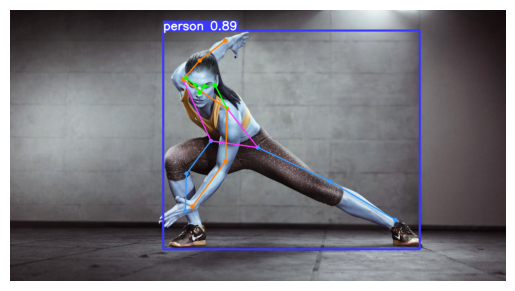

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your results object is named 'results'
for r in results:
    print(r.tojson(normalize=True))
    # r.save_crop(save_dir='sample')
    image_array = r.plot(conf=True, boxes=True)

    # Display the image
    plt.imshow(image_array)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
